In [43]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
print(df['stabf'])

0       unstable
1         stable
2       unstable
3       unstable
4       unstable
          ...   
9995    unstable
9996      stable
9997      stable
9998    unstable
9999    unstable
Name: stabf, Length: 10000, dtype: object


In [5]:
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [15]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stabf    0
dtype: int64

In [6]:
df.shape

(10000, 14)

In [7]:
df.drop('stab', axis = 1, inplace = True)
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,unstable


In [8]:
X = df.drop(columns='stabf')
y = df['stabf']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [11]:
x = df.drop(columns=['stabf'])

y = df['stabf']

In [12]:
#Split the dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print('X_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(x_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (8000, 12)
y_train shape: (8000,)
X_test shape: (2000, 12)
y_test shape: (2000,)


In [13]:
#transform train and test set using standard scaler
#ignore scaling for y since sklarn preprocessing ignores the y variable and it is also an object type.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
#put the scaled sets into a dataframe

x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [20]:
#train a RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 1)

#fit on train set
rf.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=1)

In [21]:
#make predictions on test set
rf_pred = rf.predict(x_test_scaled)

In [23]:
#model accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, rf_pred)
print('Accuracy: {}'.format(round(accuracy*100), 4))

from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, classification_report

#precision
precision = precision_score(y_test, rf_pred, pos_label='stable')
print('Precision: {}'.format(round(precision*100), 2))  

#recall
recall = recall_score(y_test, rf_pred, pos_label='stable')
print('Recall: {}'.format(round(recall*100), 2))

#F1 score
f1 = f1_score(y_test, rf_pred, pos_label='stable')
print('F1: {}'.format(round(f1*100), 2))

#classification report
print('Classification Report:\n', classification_report(y_test,rf_pred, digits =4))

#confusion matrix
rf_cnf_mat = confusion_matrix(y_test, rf_pred, labels=['unstable', 'stable'])
print('Confusion Matrix:\n', rf_cnf_mat)

Accuracy: 93
Precision: 92
Recall: 88
F1: 90
Classification Report:
               precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000

Confusion Matrix:
 [[1233   55]
 [  87  625]]


In [24]:
print("Training set score: {:.3f}".format(rf.score(x_train_scaled, y_train)))
print("Test set score: {:.3f}".format(rf.score(x_test_scaled, y_test)))

Training set score: 1.000
Test set score: 0.929


In [25]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(random_state = 1)

#fit on the train set
etc.fit(x_train_scaled, y_train)

ExtraTreesClassifier(random_state=1)

In [26]:
#predict on test set
etc_pred = etc.predict(x_test_scaled)

In [27]:
#model accuracy
etc_accuracy = accuracy_score(y_test, etc_pred)
print('Accuracy: {}'.format(round(etc_accuracy*100), 2))

#precision
etc_precision = precision_score(y_test, etc_pred, pos_label='stable')
print('Precision: {}'.format(round(etc_precision*100), 2))  

#recall
etc_recall = recall_score(y_test, etc_pred, pos_label='stable')
print('Recall: {}'.format(round(etc_recall*100), 2))

#F1 score
etc_f1 = f1_score(y_test, etc_pred, pos_label='stable')
print('F1: {}'.format(round(etc_f1*100), 2))

#classification report
print('Classification Report:\n', classification_report(y_test,etc_pred, digits =4))

#confusion matrix
etc_cnf_mat = confusion_matrix(y_test, etc_pred)
print('Confusion Matrix:\n', etc_cnf_mat)

Accuracy: 93
Precision: 94
Recall: 85
F1: 89
Classification Report:
               precision    recall  f1-score   support

      stable     0.9410    0.8511    0.8938       712
    unstable     0.9218    0.9705    0.9455      1288

    accuracy                         0.9280      2000
   macro avg     0.9314    0.9108    0.9197      2000
weighted avg     0.9287    0.9280    0.9271      2000

Confusion Matrix:
 [[ 606  106]
 [  38 1250]]


In [28]:
print("Training set score: {:.3f}".format(etc.score(x_train_scaled, y_train)))
print("Test set score: {:.3f}".format(etc.score(x_test_scaled, y_test)))

Training set score: 1.000
Test set score: 0.928


In [33]:
pip install xgboost

In [37]:
from xgboost import XGBClassifier

xbc= XGBClassifier(random_state = 1)

#fit on train set
xbc.fit(x_train_scaled, y_train)

[17:14:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
#predict on test set
xbc_pred = xbc.predict(x_test_scaled)

In [47]:
#model accuracy
xbc_accuracy = accuracy_score(y_test, xbc_pred)
print('Accuracy: {}'.format(round(xbc_accuracy*100), 2))

#precision
xbc_precision = precision_score(y_test, xbc_pred, pos_label='stable')
print('Precision: {}'.format(round(xbc_precision*100), 2))  

#recall
xbc_recall = recall_score(y_test, xbc_pred, pos_label='stable')
print('Recall: {}'.format(round(xbc_recall*100), 2))

#F1 score
xbc_f1 = f1_score(y_test, xbc_pred, pos_label='stable')
print('F1: {}'.format(round(xbc_f1*100), 2))

#classification report
print('Classification Report:\n', classification_report(y_test,xbc_pred, digits =4))

#confusion matrix
c_cnf_mat = confusion_matrix(y_test, xbc_pred)
print('Confusion Matrix:\n', xbc_cnf_mat)

Accuracy: 95
Precision: 94
Recall: 91
F1: 92
Classification Report:
               precision    recall  f1-score   support

      stable     0.9351    0.9101    0.9224       712
    unstable     0.9510    0.9651    0.9580      1288

    accuracy                         0.9455      2000
   macro avg     0.9430    0.9376    0.9402      2000
weighted avg     0.9453    0.9455    0.9453      2000

Confusion Matrix:
 [[ 648   64]
 [  45 1243]]


In [48]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [50]:
from lightgbm import LGBMClassifier

lgbm= LGBMClassifier(random_state = 1)

#fit on train set
lgbm.fit(x_train_scaled, y_train)

LGBMClassifier(random_state=1)

In [51]:
lgbm_pred = lgbm.predict(x_test_scaled)

In [52]:
#model accuracy
lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
print('Accuracy: {}'.format(round(lgbm_accuracy*100), 2))

#precision
lgbm_precision = precision_score(y_test, lgbm_pred, pos_label='stable')
print('Precision: {}'.format(round(lgbm_precision*100), 2))  

#recall
lgbm_recall = recall_score(y_test, lgbm_pred, pos_label='stable')
print('Recall: {}'.format(round(lgbm_recall*100), 2))

#F1 score
lgbm_f1 = f1_score(y_test, lgbm_pred, pos_label='stable')
print('F1: {}'.format(round(lgbm_f1*100), 2))

#classification report
print('Classification Report:\n', classification_report(y_test,lgbm_pred, digits =4))

#confusion matrix
lgbm_cnf_mat = confusion_matrix(y_test, lgbm_pred)
print('Confusion Matrix:\n', lgbm_cnf_mat)

Accuracy: 94
Precision: 93
Recall: 90
F1: 91
Classification Report:
               precision    recall  f1-score   support

      stable     0.9276    0.9003    0.9138       712
    unstable     0.9458    0.9612    0.9534      1288

    accuracy                         0.9395      2000
   macro avg     0.9367    0.9307    0.9336      2000
weighted avg     0.9393    0.9395    0.9393      2000

Confusion Matrix:
 [[ 641   71]
 [  50 1238]]


In [53]:
#combination of hyperparameters
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

In [54]:
from sklearn.model_selection import RandomizedSearchCV

#etc = ExtraTreesClassifier(random_state = 1)

#set up randomsearch with 5folds

randomcv = RandomizedSearchCV(estimator = etc, 
                              param_distributions = hyperparameter_grid, cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1,
                              random_state = 1)

In [55]:
#fit on the training data
search = randomcv.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [56]:
#get best parameters
search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

[0.11747776 0.11963764 0.11368466 0.1168143  0.03962791 0.03983972
 0.03974893 0.03912784 0.08943434 0.09412369 0.0982856  0.09219761]


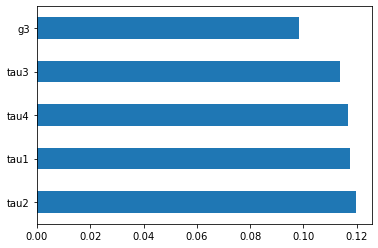

In [67]:
# Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest().plot(kind='barh')
plt.show()

In [68]:
#print feature importances
for i,v in enumerate(importances):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.11748
Feature: 1, Score: 0.11964
Feature: 2, Score: 0.11368
Feature: 3, Score: 0.11681
Feature: 4, Score: 0.03963
Feature: 5, Score: 0.03984
Feature: 6, Score: 0.03975
Feature: 7, Score: 0.03913
Feature: 8, Score: 0.08943
Feature: 9, Score: 0.09412
Feature: 10, Score: 0.09829
Feature: 11, Score: 0.09220


In [69]:
x_train_scaled.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575


In [70]:
#get best score
search.best_score_

0.9241249999999999

In [72]:
#Evaluate ExtraTreesClassifier on test set using  best params
etc2 = ExtraTreesClassifier(max_features = None, 
                            min_samples_leaf= 8,
                            min_samples_split= 2,
                            n_estimators= 1000, 
                            random_state = 1)

#fit on train set
etc2.fit(x_train_scaled, y_train)

ExtraTreesClassifier(max_features=None, min_samples_leaf=8, n_estimators=1000,
                     random_state=1)

In [73]:
#predict on test set
etc2_pred = etc2.predict(x_test_scaled)

In [74]:
#classification report
print('Classification Report:\n', classification_report(y_test,etc2_pred, digits =4))

Classification Report:
               precision    recall  f1-score   support

      stable     0.9211    0.8694    0.8945       712
    unstable     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000

